In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = "/content/drive/My Drive/UCMerced_LandUse.zip"

In [3]:
!unzip "/content/drive/My Drive/UCMerced_LandUse.zip"

Archive:  /content/drive/My Drive/UCMerced_LandUse.zip
   creating: UCMerced_LandUse/Images/
   creating: UCMerced_LandUse/Images/agricultural/
  inflating: UCMerced_LandUse/Images/agricultural/agricultural00.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural01.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural02.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural03.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural04.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural05.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural06.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural07.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural08.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural09.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural10.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural11.tif  
  in

In [5]:
from contextlib import suppress
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
from zipfile import ZipFile
from skimage.io import imread, imsave
from keras import applications
from keras import optimizers
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, classification_report
import glob
from PIL import Image
import numpy as np
import os
import glob
import re
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

Using TensorFlow backend.


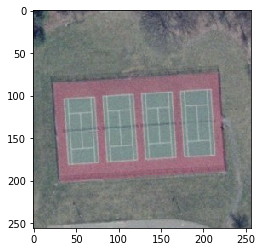

In [6]:
plt.imshow(imread('/content/UCMerced_LandUse/Images/tenniscourt/tenniscourt85.tif'))
plt.show()

In [0]:
X=[]
y=[]
class_names = os.listdir('/content/UCMerced_LandUse/Images/')
label = 0
for cl_name in class_names:
    for img in glob.glob('/content/UCMerced_LandUse/Images/'+cl_name+'/*.tif'):
      image = np.array(Image.open(img))
      n=0
      if((image.shape[0]==256) and (image.shape[1] ==256)): 
        X.append(image)
        y.append([label])
        n = n + 1
    label = label + 1
    #print(label)
X,y=np.array(X),np.array(y)

In [0]:
#Creating training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [0]:
img_rows,img_cols = 256,256
num_classes = 21

In [11]:
#Data Augmentation
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)
    
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


#Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (1542, 256, 256, 3)
1542 train samples
514 test samples


In [12]:
print(len(X),len(y))

2056 2056


In [13]:
#Model building
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(21, activation='softmax'))
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
  
datagen.fit(X_train)

In [15]:
history=model.fit_generator(datagen.flow(X_train, y_train),epochs=50,verbose=1, validation_data=datagen.flow(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





49/49 [==============================] - 163s 3s/step - loss: 3.8557 - acc: 0.0563 - val_loss: 2.9772 - val_acc: 0.1148
Epoch 2/50
49/49 [==============================] - 158s 3s/step - loss: 2.8989 - acc: 0.0804 - val_loss: 2.9047 - val_acc: 0.1051
Epoch 3/50
49/49 [==============================] - 158s 3s/step - loss: 2.8001 - acc: 0.1418 - val_loss: 2.7525 - val_acc: 0.1770
Epoch 4/50
49/49 [==============================] - 158s 3s/step - loss: 2.6604 - acc: 0.2107 - val_loss: 3.1010 - val_acc: 0.1323
Epoch 5/50
49/49 [==============================] - 158s 3s/step - loss: 2.7027 - acc: 0.1614 - val_loss: 2.5948 - val_acc: 0.1751
Epoch 6/50
49/49 [==============================] - 159s 3s/step - loss: 2.5006 - acc: 0.2327 - val_loss: 2.4300 - val_acc: 0.2393
Epoch 7/50
49/49 [==============================] - 159s 3s/step - loss: 2.3892 - acc: 0.2555 - val_loss: 2.2669

In [0]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

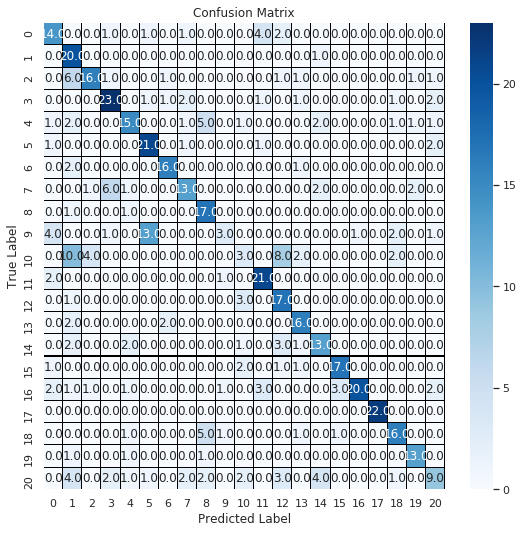

In [17]:
#Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1) 
conf_mat = confusion_matrix(y_true, y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(conf_mat, annot=True, linewidths=0.01,cmap="Blues",linecolor="black", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [18]:
#Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

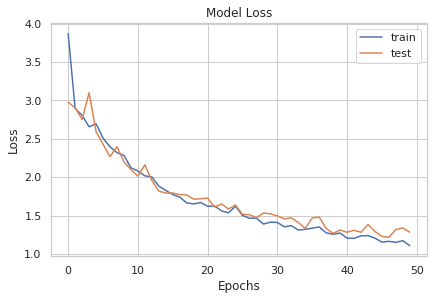

In [19]:
#Loss v/s Epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

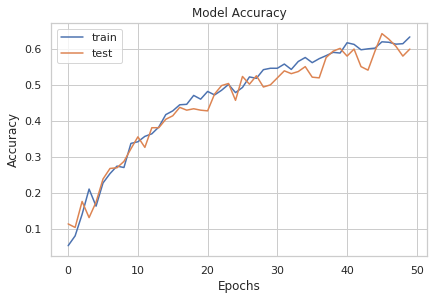

In [20]:
#Accuracy v/s Epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()